# Manipulacion de datos con Pandas

In [1]:
# Impotamos las lbrerias necesarias
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import pandas as pd
import requests
import os

In [3]:
pd?

Acomodo en un solo arreglo del archivo de manchas solares:

In [2]:
sun = np.loadtxt('Sunspots.txt').T
ano, nmanchas = np.reshape(sun[::2], (1, 300))[0], np.reshape(sun[1::2], (1,300))[0]

Text(0,0.5,'Numero de manchas')

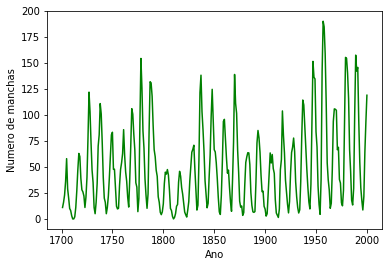

In [8]:
plt.plot(ano, nmanchas, '-', color='g')
plt.xlabel("Ano")
plt.ylabel("Numero de manchas")

## INTRODUCCION A LOS OBJETOS DE PANDAS

### EL OBJETO SERIES DE PANDAS

Una serie de Pandas es un arreglo de una dimension de datos con indices. Ejemplo de creacion:

In [9]:
# ARREGLO CON FLOTANTES
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [10]:
# ARREGLO CON ENTEROS
data1 = pd.Series([50, 100, -50, -200])
data1

0     50
1    100
2    -50
3   -200
dtype: int64

Los datos de salida son una lista con un indice. Se puede acceder a estos valores de la siguiente manera:

In [11]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [12]:
data1.values

array([  50,  100,  -50, -200])

In [13]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [14]:
data1.index

RangeIndex(start=0, stop=4, step=1)

In [18]:
data[0]

0.25

In [19]:
data[0:3]

0    0.25
1    0.50
2    0.75
dtype: float64

In [20]:
data1[0]

50

In [21]:
data1[0:3]

0     50
1    100
2    -50
dtype: int64

### LAS SERIES COMO ARREGLOS GENERALIZADOS DE NUMPY

Las series no necesariamente llevan un indice con valor numerico, pueden ser una cadena de caracteres, por ejemplo:

In [22]:
data3 = pd.Series([10, 20, 30, 40],
                 index=['hola1', 'hola2', 'hola3', 'hola4'])
data3

hola1    10
hola2    20
hola3    30
hola4    40
dtype: int64

Ejemplo de como accesar a esta serie mediante su indice:

In [24]:
data3['hola3']

30

### SERIES COMO DICCIONARIOS ESPECIALIZADOS

En algunas ocasiones en que se manipulan series, es conveniente trabajarlas como diccionarios, que son basicamente series con indices en forma de cadenas de texto. Estas series pueden construirse apartir de objetos directamente desde un diccionario de Python. Por ejemplo:

In [25]:
medidas = {'masa1': 383.32521,
                   'peso1': 264.48193,
                   'volumen1': 196.51127,
                   'temperatura1': 195.52860,
                   'presion1': 128.82135}
medida = pd.Series(medidas)
medida

masa1           383.32521
peso1           264.48193
volumen1        196.51127
temperatura1    195.52860
presion1        128.82135
dtype: float64

In [26]:
medida['volumen1']

196.51127

### CONSTRUYENDO AL OBJETO SERIE

In [ ]:
#codigo base
pd.Series(data, index=index)
# index es un valor opcional

Ejemplos:

In [29]:
pd.Series([13,20,15,1111111])

0         13
1         20
2         15
3    1111111
dtype: int64

In [30]:

pd.Series(5, index=[1, 558, 7])

1      5
558    5
7      5
dtype: int64

### EL OBJETO MARCO DE DATOS DE PANDAS

Los marcos de datos de pandas son series que contienen mas de un arreglo de datos con el mismo indice:

In [6]:
unidad = {'ACERO': 'TON',
                   'CONCRETO': 'TON',
                   'CARBON': 'TON',
                   'PETROLEO': 'BARRIL',
                   'GAS': 'M3',
                   'GASOLINA': 'LITRO'}
unidades = pd.Series(unidad)
unidad

{'ACERO': 'TON',
 'CONCRETO': 'TON',
 'CARBON': 'TON',
 'PETROLEO': 'BARRIL',
 'GAS': 'M3',
 'GASOLINA': 'LITRO'}

In [3]:
precio = {'ACERO': 10000, 'CONCRETO': 5000, 'CARBON': 2500, 'PETROLEO': 300, 'GAS': 250, 'GASOLINA': 20}
precios = pd.Series(precio)
precios

ACERO       10000
CONCRETO     5000
CARBON       2500
PETROLEO      300
GAS           250
GASOLINA       20
dtype: int64

Ahora construimos un objeto bidimensional con estas dos series

In [9]:
    productos = pd.DataFrame({'precios': precios,'unidades': unidades,})
    productos

,precios,unidades
ACERO,10000,TON
CONCRETO,5000,TON
CARBON,2500,TON
PETROLEO,300,BARRIL
GAS,250,M3
GASOLINA,20,LITRO


De forma similar a las series, los marcos de datos tienen un indice que da acceso a las etiquetas:

In [10]:
productos.index

Index(['ACERO', 'CONCRETO', 'CARBON', 'PETROLEO', 'GAS', 'GASOLINA'], dtype='object')

Tambien se puede accesar a las columnas:

In [11]:
productos.columns

Index(['precios', 'unidades'], dtype='object')

### MARCOS DE DATOS COMO DICCIONARIOS ESPECIALIZADOS

A partir de un Dataframe podemos llamar a sus atributos y se obtener una serie original con la que se creo el Dataframe:

In [12]:
productos['precios']

ACERO       10000
CONCRETO     5000
CARBON       2500
PETROLEO      300
GAS           250
GASOLINA       20
Name: precios, dtype: int64

### Construyendo Dataframes

Existen diversas formas de crear un Dataframe:

-Apartir de una simple serie:

In [13]:
pd.DataFrame(precios, columns=['precios'])

,precios
ACERO,10000
CONCRETO,5000
CARBON,2500
PETROLEO,300
GAS,250
GASOLINA,20


-Desde una lista de diccionarios:

In [15]:
datos = [{'a': i, 'b': 2 * i, 'c': 3 * i, 'c': 3 * i}
        for i in range(4)]
pd.DataFrame(datos)

,a,b,c
0,0,0,0
1,1,2,3
2,2,4,6
3,3,6,9


-Desde un diccionario de objetos Serie:

In [21]:
productos = pd.DataFrame({'precios': precios,'unidades': unidades,})
productos

,precios,unidades
ACERO,10000,TON
CONCRETO,5000,TON
CARBON,2500,TON
PETROLEO,300,BARRIL
GAS,250,M3
GASOLINA,20,LITRO


-Desde un arreglo bidimensional de numpy:

In [35]:
pd.DataFrame(np.array([('TON', 1000), ('TON', 500), ('BARIIL', 200)]),
             columns=['UNIDAD', 'CANTIDAD'],
             index=['CONCRETO', 'ACERO', 'PETROLEO'])

,UNIDAD,CANTIDAD
CONCRETO,TON,1000
ACERO,TON,500
PETROLEO,BARIIL,200


In [31]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['UNIDAD', 'CANTIDAD'],
             index=['CONCRETO', 'ACERO', 'PETROLEO'])

,UNIDAD,CANTIDAD
CONCRETO,0.003824,0.465131
ACERO,0.988109,0.387982
PETROLEO,0.945354,0.662622


### EL OBJETO INDICES DE PANDAS

Ejemplo de construccion de lista de indices para comenzar a ver sus propiedades:

In [36]:
ind = pd.Index([2, 2, 5, 7, 11])
ind

Int64Index([2, 2, 5, 7, 11], dtype='int64')

Los indices funcionan como arreglos, podemos usar la notacion de python para obtener un valor:

In [37]:
ind[4]

11

In [40]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

Los indices no pueden ser modificados con comandos normales:

In [41]:
ind[1] = 0

TypeError: Index does not support mutable operations

### INDICE COMO CONJUNTO ORDENADO

Las uniones, intersecciones, diferencias y otras combinaciones pueden ser obtenidas de forma similar a los comandos con arreglos de python:

In [45]:
indA = pd.Index(['ACERO', 'CONCRETO', 'GAS', 'GASOLINA'])
indB = pd.Index(['PETROLEO', 'HIERRO', 'CONCRETO', 'NIQUEL'])

In [46]:
indA & indB  # interseccion

Index(['CONCRETO'], dtype='object')

In [47]:
indA | indB  # union

Index(['ACERO', 'CONCRETO', 'GAS', 'GASOLINA', 'HIERRO', 'NIQUEL', 'PETROLEO'], dtype='object')

In [48]:
indA ^ indB  # diferencia simetrica

Index(['ACERO', 'GAS', 'GASOLINA', 'HIERRO', 'NIQUEL', 'PETROLEO'], dtype='object')

## SELECCION DE DATOS Y ASIGNACION DE INDICES

### SELECCION DE DATOS EN SERIES

Para esta seccion se utilizaran los datos de lluvia, temperatura maxima, temperatura minima y temperatura promedio de 2019 obtenidos del INEGI

In [3]:
# SE CARGAN LOS ARCHIVOS DE DATOS DE 2019
LLUVIA_2019 = pd.read_csv('201901010000Lluv.csv',encoding='latin-1')
LLUVIA_2018 = pd.read_csv('201801010000Lluv.csv',encoding='latin-1')

In [3]:
LLUVIA_2019.describe()

,LON,LAT,ENE
count,1241.000000,1241.000000,1241.000000
mean,-100.250595,21.343238,19.300725
std,5.034885,3.635284,34.990207
min,-117.071389,14.626111,0.000000
25%,-102.953333,19.010556,1.020000
50%,-99.501111,20.257500,7.200000
75%,-97.844167,23.726667,21.200000
max,-86.820278,32.705000,274.700000


Se pueden utilizar expresiones similares a las de python para examinar los indices y valores:

In [3]:
'LON' in LLUVIA_2019

True

In [21]:
LLUVIA_2019

,LON,LAT,EDO,CLAVE_SIH,NOMBRE,ENE
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags.",6.61
1,-102.466944,22.188611,AGS,ANVAG,"Cincuenta Aniversario, Ags.",10.60
2,-102.184167,21.738611,AGS,BRTAG,"San Bartolo, Ags.",10.50
3,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",18.17
4,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",16.70
5,-102.197222,22.007222,AGS,CHOAG,"Cañada Honda, Ags.",17.30
6,-102.189167,21.826667,AGS,CLVAG,"Calvillo, Ags.",9.20
7,-102.000000,21.896389,AGS,CNSAG,"Los Conos, Ags.",13.20
8,-102.296667,22.362778,AGS,CSOAG,"Cosío, Ags.",7.20
9,-102.356944,22.121667,AGS,JCQAG,"Jocoque, Ags.",6.30


In [4]:
LLUVIA_2019.LON[0]

-102.309722

In [5]:
LLUVIA_2019.LON

0      -102.309722
1      -102.466944
2      -102.184167
3      -102.712222
4      -102.676944
5      -102.197222
6      -102.189167
7      -102.000000
8      -102.296667
9      -102.356944
10     -102.788333
11     -102.371667
12     -102.001944
13     -102.290556
14     -102.465000
15     -101.966667
16     -102.291944
17     -102.417222
18     -102.133333
19     -102.437500
20     -102.108889
21     -102.127778
22     -102.067500
23     -116.204167
24     -116.908333
25     -114.719167
26     -116.696944
27     -116.828333
28     -116.602500
29     -115.150000
           ...    
1211   -103.001944
1212   -102.566944
1213   -103.603056
1214   -102.660556
1215   -103.382778
1216   -101.985556
1217   -103.216944
1218   -103.363889
1219   -103.561667
1220   -102.845556
1221   -102.615000
1222   -102.798056
1223   -101.399167
1224   -102.903611
1225   -103.025833
1226   -102.884444
1227   -103.506111
1228   -103.636667
1229   -103.495833
1230   -103.108889
1231   -102.864167
1232   -103.

In [6]:
print(LLUVIA_2019.keys())

Index(['LON', 'LAT', 'EDO', 'CLAVE_SIH', 'NOMBRE', 'ENE'], dtype='object')


In [7]:
print(TMAX_2019.keys())

Index(['Lon', 'Lat', 'Clave', 'Edo', 'Est', 'Tmax'], dtype='object')


In [8]:
print(TMIN_2019.keys())

Index(['Lon', 'Lat', 'Clave', 'Edo', 'Est', 'Tmin'], dtype='object')


In [9]:
print(TMED_2019.keys())

Index(['Lon', 'Lat', 'Clave', 'Edo', 'Est', 'Tmed'], dtype='object')


### SERIES COMO UN ARREGLO DE UNA DIMENSION

De forma similar a los comandos de python, se pueden usar comandos para filtrar la informacion de una serie:

In [10]:
LLUVIA_2019.LON[0:5] # corte o slice

0   -102.309722
1   -102.466944
2   -102.184167
3   -102.712222
4   -102.676944
Name: LON, dtype: float64

In [11]:
LLUVIA_2019.LON[(LLUVIA_2019.LON > -102.4) & (LLUVIA_2019.LON < -102.3)] # masking

0      -102.309722
9      -102.356944
11     -102.371667
595    -102.371667
596    -102.371111
628    -102.325000
938    -102.371667
1202   -102.347222
1236   -102.344167
Name: LON, dtype: float64

In [12]:
LLUVIA_2019.LON[[0, 4]] # fancy indexing

0   -102.309722
4   -102.676944
Name: LON, dtype: float64

### INDEXERS: LOC, ILOC, E IX

Las funciones loc, iloc, e ix permiten llamar a los indices de una serie y permitirnos diferenciar entre los indices usados para las Series y los indices usados en python.

El atributo loc permite indexar y cortar series refernciadas a un indice explcito:

In [14]:
LLUVIA_2019.LON.loc[1]

-102.466944

In [15]:
LLUVIA_2019.LON.loc[1:3]

1   -102.466944
2   -102.184167
3   -102.712222
Name: LON, dtype: float64

El atributo iloc permite indexar y cortar series refernciadas a un indice estilo python:

In [17]:
LLUVIA_2019.LON.iloc[1]

-102.466944

In [18]:
LLUVIA_2019.LON.iloc[1:3]

1   -102.466944
2   -102.184167
Name: LON, dtype: float64

El atributo ix es un hibrido entre los dos anteriores:

In [19]:
LLUVIA_2019.LON.ix[1]

/home/luiscantero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


-102.466944

In [20]:
LLUVIA_2019.LON.ix[1:3]

/home/luiscantero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


1   -102.466944
2   -102.184167
3   -102.712222
Name: LON, dtype: float64

### Dataframes como arreglos de dos dimensiones:

In [22]:
LLUVIA_2019.LON is LLUVIA_2019['LON']

True

In [23]:
LLUVIA_2019['LON']

0      -102.309722
1      -102.466944
2      -102.184167
3      -102.712222
4      -102.676944
5      -102.197222
6      -102.189167
7      -102.000000
8      -102.296667
9      -102.356944
10     -102.788333
11     -102.371667
12     -102.001944
13     -102.290556
14     -102.465000
15     -101.966667
16     -102.291944
17     -102.417222
18     -102.133333
19     -102.437500
20     -102.108889
21     -102.127778
22     -102.067500
23     -116.204167
24     -116.908333
25     -114.719167
26     -116.696944
27     -116.828333
28     -116.602500
29     -115.150000
           ...    
1211   -103.001944
1212   -102.566944
1213   -103.603056
1214   -102.660556
1215   -103.382778
1216   -101.985556
1217   -103.216944
1218   -103.363889
1219   -103.561667
1220   -102.845556
1221   -102.615000
1222   -102.798056
1223   -101.399167
1224   -102.903611
1225   -103.025833
1226   -102.884444
1227   -103.506111
1228   -103.636667
1229   -103.495833
1230   -103.108889
1231   -102.864167
1232   -103.

Recordatorio: Se pueden llamar los valores de una serie en los Data frame con 'values':

In [24]:
LLUVIA_2019['LON'].values

array([-102.309722, -102.466944, -102.184167, ..., -101.715833,
       -103.3375  , -102.576667])

Ejemplo de como transponer el Dataframe para cambiar filas por columnas:

In [30]:
LLUVIA_2019['LON'].T

0      -102.309722
1      -102.466944
2      -102.184167
3      -102.712222
4      -102.676944
5      -102.197222
6      -102.189167
7      -102.000000
8      -102.296667
9      -102.356944
10     -102.788333
11     -102.371667
12     -102.001944
13     -102.290556
14     -102.465000
15     -101.966667
16     -102.291944
17     -102.417222
18     -102.133333
19     -102.437500
20     -102.108889
21     -102.127778
22     -102.067500
23     -116.204167
24     -116.908333
25     -114.719167
26     -116.696944
27     -116.828333
28     -116.602500
29     -115.150000
           ...    
1211   -103.001944
1212   -102.566944
1213   -103.603056
1214   -102.660556
1215   -103.382778
1216   -101.985556
1217   -103.216944
1218   -103.363889
1219   -103.561667
1220   -102.845556
1221   -102.615000
1222   -102.798056
1223   -101.399167
1224   -102.903611
1225   -103.025833
1226   -102.884444
1227   -103.506111
1228   -103.636667
1229   -103.495833
1230   -103.108889
1231   -102.864167
1232   -103.

De esta forma se puede introducir un indice simple para accesar a una fila:

In [31]:
LLUVIA_2019.values[0]

array([-102.309722, 21.895, 'AGS', 'AGSAG', 'Aguascalientes, Ags.', 6.61],
      dtype=object)

Ahora tmbien se puede pasar un indice a un Dataframe para accesar a una columna:

In [32]:
LLUVIA_2019.LON

0      -102.309722
1      -102.466944
2      -102.184167
3      -102.712222
4      -102.676944
5      -102.197222
6      -102.189167
7      -102.000000
8      -102.296667
9      -102.356944
10     -102.788333
11     -102.371667
12     -102.001944
13     -102.290556
14     -102.465000
15     -101.966667
16     -102.291944
17     -102.417222
18     -102.133333
19     -102.437500
20     -102.108889
21     -102.127778
22     -102.067500
23     -116.204167
24     -116.908333
25     -114.719167
26     -116.696944
27     -116.828333
28     -116.602500
29     -115.150000
           ...    
1211   -103.001944
1212   -102.566944
1213   -103.603056
1214   -102.660556
1215   -103.382778
1216   -101.985556
1217   -103.216944
1218   -103.363889
1219   -103.561667
1220   -102.845556
1221   -102.615000
1222   -102.798056
1223   -101.399167
1224   -102.903611
1225   -103.025833
1226   -102.884444
1227   -103.506111
1228   -103.636667
1229   -103.495833
1230   -103.108889
1231   -102.864167
1232   -103.

Usando iloc podemos partir un Dataframe sin que las etiquetas de los indices y las columnas se modifiquen:

In [34]:
LLUVIA_2019.iloc[:5, :5]

,LON,LAT,EDO,CLAVE_SIH,NOMBRE
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags."
1,-102.466944,22.188611,AGS,ANVAG,"Cincuenta Aniversario, Ags."
2,-102.184167,21.738611,AGS,BRTAG,"San Bartolo, Ags."
3,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*"
4,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags."


In [33]:
LLUVIA_2019.iloc[:3, :2]

,LON,LAT
0,-102.309722,21.895000
1,-102.466944,22.188611
2,-102.184167,21.738611


In [35]:
LLUVIA_2019.iloc[1:3, 1:2]

,LAT
1,22.188611
2,21.738611


Usando loc podemos partir un Dataframe usando el nombre explicito de columnas e indices:

In [40]:
LLUVIA_2019.loc[:3, :'CLAVE_SIH']

,LON,LAT,EDO,CLAVE_SIH
0,-102.309722,21.895000,AGS,AGSAG
1,-102.466944,22.188611,AGS,ANVAG
2,-102.184167,21.738611,AGS,BRTAG
3,-102.712222,21.849167,AGS,CALVILLO


Usando ix podemos partir un Dataframe usando el nombre explicito de columnas e indices o el indice explicito del Dataframe o un combinado:

In [41]:
LLUVIA_2019.loc[:3, :'CLAVE_SIH']

,LON,LAT,EDO,CLAVE_SIH
0,-102.309722,21.895000,AGS,AGSAG
1,-102.466944,22.188611,AGS,ANVAG
2,-102.184167,21.738611,AGS,BRTAG
3,-102.712222,21.849167,AGS,CALVILLO


Cualquier comando de familiar de numpy puede ser usado con estos 'indexers', por ejemplo:

In [43]:
LLUVIA_2019.loc[LLUVIA_2019.LAT > 21.8, ['LAT', 'EDO', 'CLAVE_SIH']]

,LAT,EDO,CLAVE_SIH
0,21.895000,AGS,AGSAG
1,22.188611,AGS,ANVAG
3,21.849167,AGS,CALVILLO
4,21.997500,AGS,CDRAG
5,22.007222,AGS,CHOAG
6,21.826667,AGS,CLVAG
7,21.896389,AGS,CNSAG
8,22.362778,AGS,CSOAG
9,22.121667,AGS,JCQAG
10,21.807500,AGS,MNLAG


In [45]:
LLUVIA_2019.iloc[0:2]

,LON,LAT,EDO,CLAVE_SIH,NOMBRE,ENE
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags.",6.61
1,-102.466944,22.188611,AGS,ANVAG,"Cincuenta Aniversario, Ags.",10.60


## Operando en datos de Pandas

### Ufuncs: preservacion de indices

Si aplicamos una Ufunc de numpy en un dataframe, el resultado sera otro objeto de Pandas con los indices preservados:

In [8]:
LLUVIA_2019.LON

0      -102.309722
1      -102.466944
2      -102.184167
3      -102.712222
4      -102.676944
5      -102.197222
6      -102.189167
7      -102.000000
8      -102.296667
9      -102.356944
10     -102.788333
11     -102.371667
12     -102.001944
13     -102.290556
14     -102.465000
15     -101.966667
16     -102.291944
17     -102.417222
18     -102.133333
19     -102.437500
20     -102.108889
21     -102.127778
22     -102.067500
23     -116.204167
24     -116.908333
25     -114.719167
26     -116.696944
27     -116.828333
28     -116.602500
29     -115.150000
           ...    
1211   -103.001944
1212   -102.566944
1213   -103.603056
1214   -102.660556
1215   -103.382778
1216   -101.985556
1217   -103.216944
1218   -103.363889
1219   -103.561667
1220   -102.845556
1221   -102.615000
1222   -102.798056
1223   -101.399167
1224   -102.903611
1225   -103.025833
1226   -102.884444
1227   -103.506111
1228   -103.636667
1229   -103.495833
1230   -103.108889
1231   -102.864167
1232   -103.

In [7]:

np.exp(LLUVIA_2019.LON)

0       3.693621e-45
1       3.156252e-45
2       4.187744e-45
3       2.469726e-45
4       2.558408e-45
5       4.133428e-45
6       4.166858e-45
7       5.034575e-45
8       3.742157e-45
9       3.523255e-45
10      2.288728e-45
11      3.471762e-45
12      5.024798e-45
13      3.765095e-45
14      3.162394e-45
15      5.205221e-45
16      3.759873e-45
17      3.317154e-45
18      4.406127e-45
19      3.250566e-45
20      4.515158e-45
21      4.430672e-45
22      4.705957e-45
23      3.413277e-51
24      1.687936e-51
25      1.506950e-50
26      2.085265e-51
27      1.828520e-51
28      2.291805e-51
29      9.794684e-51
            ...     
1211    1.848520e-45
1212    2.855895e-45
1213    1.013362e-45
1214    2.600681e-45
1215    1.263077e-45
1216    5.107822e-45
1217    1.490908e-45
1218    1.287163e-45
1219    1.056184e-45
1220    2.161437e-45
1221    2.721897e-45
1222    2.266582e-45
1223    9.181239e-45
1224    2.039528e-45
1225    1.804884e-45
1226    2.078996e-45
1227    1.116

### Alimeamineto de indices en series

Cuando aplicamos una opracion entre series, esta se aplica entre los valores con los mismos indices en ambos objetos:

In [12]:
LLUVIA_2019.LON / LLUVIA_2019.LAT

0      -4.672744
1      -4.617997
2      -4.700584
3      -4.700967
4      -4.667664
5      -4.643804
6      -4.681849
7      -4.658302
8      -4.574417
9      -4.627000
10     -4.713440
11     -4.700260
12     -4.632124
13     -4.681312
14     -4.617794
15     -4.652471
16     -4.615542
17     -4.625659
18     -4.600025
19     -4.607038
20     -4.665702
21     -4.683090
22     -4.618903
23     -3.600780
24     -3.603308
25     -3.859061
26     -3.592948
27     -3.598255
28     -3.656365
29     -3.552794
          ...   
1211   -4.548998
1212   -4.502719
1213   -4.566638
1214   -4.464096
1215   -4.525346
1216   -4.580590
1217   -4.452845
1218   -4.872782
1219   -4.642575
1220   -4.815430
1221   -4.107384
1222   -4.599923
1223   -4.584567
1224   -4.739675
1225   -4.325737
1226   -4.230059
1227   -4.261508
1228   -4.384160
1229   -4.635525
1230   -4.497934
1231   -4.650162
1232   -4.425697
1233   -4.819219
1234   -4.767335
1235   -4.744709
1236   -4.394602
1237   -4.525563
1238   -4.5515

El arreglo final contiene la union de los indices de ambos objetos:

In [14]:
LLUVIA_2019.LON.index | LLUVIA_2019.LAT.index

RangeIndex(start=0, stop=1241, step=1)

Si existe un indice que no aparece en uno u otro de los objetos el valor que se obtiene en los valores de los indices inexistentes es un NaN "Not a Number":

In [18]:
LLUVIA_2019.LON[:5] / LLUVIA_2019.LAT[3:5]

0         NaN
1         NaN
2         NaN
3   -4.700967
4   -4.667664
dtype: float64

Si se quiere evitar este resultado, se pueden llenar esos valores utilizando metodos apropiados sobre esos objetos. Por ejemplo;

In [21]:
LLUVIA_2019.LON[:5].add(LLUVIA_2019.LAT[3:5], fill_value=0)

0   -102.309722
1   -102.466944
2   -102.184167
3    -80.863055
4    -80.679444
dtype: float64

## Manipulando datos perdidos

### Datos pythonicos perdidos

El dato perdido "None" es un objeto de pyhton y no puede ser usado en arreglos de numpy o pandas, unicamente con arreglos de datos tipo 'object':

In [23]:
vale = np.array([1, None, 3, 4])
vale

array([1, None, 3, 4], dtype=object)

El uso de un arrglo como estos genera un error cuando, por ejemplo, usamos una funcion de suma sobre el arreglo:

In [25]:
sum(vale)

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

El objeto NaN es otra representacion de datos perdidos reconocido por todos los sistemas que usan la representacion IEEE de punto flotante. Un arreglo que contiene a estos objetos no cambia su clasificacion como arreglo si tiene un valor NaN, por ejemplo:

In [28]:
vale = np.array([1, np.nan, 3, 4])
vale.dtype

dtype('float64')

El resultado aritmetico entre un numero y un valor NaN, es siempre un valor NaN:

In [31]:
1 + np.nan

nan

In [33]:
0 *  np.nan

nan

### Detectando valores nulos

Una forma de saber si existe un valor nulo con Pandas es con un mask booleano, por ejemplo:

In [40]:
vale = pd.Series([1, np.nan, 3, 4, np.nan, 3, 4, np.nan, 3, 4, np.nan, 3, 4])
vale.isnull()

0     False
1      True
2     False
3     False
4      True
5     False
6     False
7      True
8     False
9     False
10     True
11    False
12    False
dtype: bool

Una mask booleana puede ser usada como el indice de una Serie o un Dataframe:

In [41]:
vale[vale.notnull()]

0     1.0
2     3.0
3     4.0
5     3.0
6     4.0
8     3.0
9     4.0
11    3.0
12    4.0
dtype: float64

### Quitando los valores nulos

Una forma de quitar los valores NA es con dropna():

In [42]:
vale.dropna()

0     1.0
2     3.0
3     4.0
5     3.0
6     4.0
8     3.0
9     4.0
11    3.0
12    4.0
dtype: float64

### Llenando los valore nulos:

Se pueden cambiar los valores NaN en una Serie con fillna()

In [46]:
vale = pd.Series([1, np.nan, 3, 13, np.nan, 3, 20, np.nan, 3, 50, np.nan, 3, 4])
vale

0      1.0
1      NaN
2      3.0
3     13.0
4      NaN
5      3.0
6     20.0
7      NaN
8      3.0
9     50.0
10     NaN
11     3.0
12     4.0
dtype: float64

En este caso se cambian por un cero:

In [48]:
vale.fillna(0)

0      1.0
1      0.0
2      3.0
3     13.0
4      0.0
5      3.0
6     20.0
7      0.0
8      3.0
9     50.0
10     0.0
11     3.0
12     4.0
dtype: float64

Este metodo tambien puede llenar los NaN con el valor anterior donde se encuentre un NaN, por ejemplo:

In [49]:
vale.fillna(method='ffill')

0      1.0
1      1.0
2      3.0
3     13.0
4     13.0
5      3.0
6     20.0
7     20.0
8      3.0
9     50.0
10    50.0
11     3.0
12     4.0
dtype: float64

Tambien se puede hacer lo mismo usando el siguiente valor que no es NaN, por ejemlo:

In [50]:
vale.fillna(method='bfill')

0      1.0
1      3.0
2      3.0
3     13.0
4      3.0
5      3.0
6     20.0
7      3.0
8      3.0
9     50.0
10     3.0
11     3.0
12     4.0
dtype: float64

## Combinando conjuntos de datos: concat y append

### Concatenacion simple con pd.concat

pd.concat es una funcion similar a concatenate de numpy, por ejemplo:

In [3]:
ser1 = pd.Series(['ACERO', 'CONCRETO', 'GASOLINA'], index=[1, 2, 3])
ser2 = pd.Series(['NIQUEL', 'AZUFRE', 'PETROLEO'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1       ACERO
2    CONCRETO
3    GASOLINA
4      NIQUEL
5      AZUFRE
6    PETROLEO
dtype: object

Otro metodo de cocatenar series y dataframes es con append():

In [4]:
ser1.append(ser2)

1       ACERO
2    CONCRETO
3    GASOLINA
4      NIQUEL
5      AZUFRE
6    PETROLEO
dtype: object

## Combinando conjuntos de datos: merge and join

#### Join uno a uno

EL join uno a uno es bastante similar a la concatenacion de columnas que se genera con concat() o con append(). Por ejemplo:

pd.merge() reconoce en el siguiente ejemplo que el dataframe LLUVIA_2019 y LLUVIA_2018 tienen una columna llamada LON y automaticamente une los dataframes usando esta columna como base:

In [8]:
len(LLUVIA_2018)

1884

In [9]:
len(LLUVIA_2019)

1241

In [54]:
df3 = pd.merge(LLUVIA_2018, LLUVIA_2019)
len(df3)

93

El resultado es un dataframe con 93 renglones. Estos renglones son los que tienen el mismo valor de LEN en  LLUVIA_2019 y LLUVIA_2018

In [55]:
df3

,LON,LAT,ESTADO,CLAVE_SIH,NOMBRE,ENE,EDO
0,-108.166667,29.666667,CHIH,YEPCH,"Yepachic, Chih.",0.0,CHIH
1,-92.479167,16.308333,CHIS,CASCP,"Cascajal, Chis.",0.0,CHIS
2,-92.755278,15.071111,CHIS,ENCRUCIJADA,"La Encrucijada, Chis. SMN*",0.0,CHIS
3,-93.216667,15.691667,CHIS,PIJCP,"Pijijiapan, Chis.",0.0,CHIS
4,-92.183333,14.900000,CHIS,TAPCP,"Tapachula, Chis.",0.0,CHIS
5,-93.529167,15.875000,CHIS,TPICP,"Tres Picos, Chis.",0.0,CHIS
6,-100.953889,29.034167,COAH,SMGCL,"San Miguel, Coah.",0.0,COAH
7,-105.331111,26.433056,DGO,SANANTONIO,"San Antonio, Dgo. SGT*",0.0,DGO
8,-105.566667,26.084444,DGO,SRDDR,"Sardinas, Dgo.",0.0,DGO
9,-99.906667,16.849722,GRO,ACAGR,"Acapulco, Gro.",0.0,GRO


#### Uniones muchos a uno

Se puden unir dataframes donde las columnas base contienen entradas duplicadas, por ejemplo:

In [68]:
join2 = LLUVIA_2019.iloc[:5, :4]
join2

,LON,LAT,EDO,CLAVE_SIH
0,-102.309722,21.895000,AGS,AGSAG
1,-102.466944,22.188611,AGS,ANVAG
2,-102.184167,21.738611,AGS,BRTAG
3,-102.712222,21.849167,AGS,CALVILLO
4,-102.676944,21.997500,AGS,CDRAG


In [69]:
join3 = LLUVIA_2019.iloc[:3, 2:5]
join3

,EDO,CLAVE_SIH,NOMBRE
0,AGS,AGSAG,"Aguascalientes, Ags."
1,AGS,ANVAG,"Cincuenta Aniversario, Ags."
2,AGS,BRTAG,"San Bartolo, Ags."


In [70]:
pd.merge(join2,join3)

,LON,LAT,EDO,CLAVE_SIH,NOMBRE
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags."
1,-102.466944,22.188611,AGS,ANVAG,"Cincuenta Aniversario, Ags."
2,-102.184167,21.738611,AGS,BRTAG,"San Bartolo, Ags."


### Especificar la 'base' para la combinacion

Se puede usar la funcion 'on' para especificar cual sera la columna 'base' para el merge()

In [75]:
ej1 = pd.merge(LLUVIA_2018, LLUVIA_2019, on='CLAVE_SIH')
len(ej1)

1069

In [74]:
ej1

,LON_x,LAT_x,ESTADO,CLAVE_SIH,NOMBRE_x,ENE_x,LON_y,LAT_y,EDO,NOMBRE_y,ENE_y
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags.",25.8,-102.309722,21.895000,AGS,"Aguascalientes, Ags.",6.61
1,-102.466944,22.188611,AGS,ANVAG,"Cincuenta Aniversario, Ags.",58.6,-102.466944,22.188611,AGS,"Cincuenta Aniversario, Ags.",10.60
2,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",56.0,-102.712222,21.849167,AGS,"Calvillo, Ags. SMN*",18.17
3,-102.712222,21.849444,AGS,CALVILLO,Calvillo,54.0,-102.712222,21.849167,AGS,"Calvillo, Ags. SMN*",18.17
4,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",50.0,-102.676944,21.997500,AGS,"La Codorniz, Ags.",16.70
5,-102.197222,22.007222,AGS,CHOAG,"Cañada Honda, Ags.",17.2,-102.197222,22.007222,AGS,"Cañada Honda, Ags.",17.30
6,-102.189167,21.826667,AGS,CLVAG,"Calvillito, Ags.",13.5,-102.189167,21.826667,AGS,"Calvillo, Ags.",9.20
7,-102.000000,21.896389,AGS,CNSAG,"Los Conos, Ags.",51.5,-102.000000,21.896389,AGS,"Los Conos, Ags.",13.20
8,-102.296667,22.362778,AGS,CSOAG,"Cosio, Ags.",35.5,-102.296667,22.362778,AGS,"Cosío, Ags.",7.20
9,-102.788333,21.807500,AGS,MNLAG,"Media Luna, Ags.",48.9,-102.788333,21.807500,AGS,"Media Luna, Ags.",24.30


In [88]:
join5 = LLUVIA_2019.iloc[:3, 2:5]
join5

,EDO,CLAVE_SIH,NOMBRE
0,AGS,AGSAG,"Aguascalientes, Ags."
1,AGS,ANVAG,"Cincuenta Aniversario, Ags."
2,AGS,BRTAG,"San Bartolo, Ags."


In [89]:
join6 = LLUVIA_2018.iloc[:5, :4]
join6

,LON,LAT,ESTADO,CLAVE_SIH
0,-102.309722,21.895000,AGS,AGSAG
1,-102.466944,22.188611,AGS,ANVAG
2,-102.712222,21.849167,AGS,CALVILLO
3,-102.676944,21.997500,AGS,CDRAG
4,-102.197222,22.007222,AGS,CHOAG


In [90]:
pd.merge(join5, join6, left_on="EDO", right_on="ESTADO")

,EDO,CLAVE_SIH_x,NOMBRE,LON,LAT,ESTADO,CLAVE_SIH_y
0,AGS,AGSAG,"Aguascalientes, Ags.",-102.309722,21.895000,AGS,AGSAG
1,AGS,AGSAG,"Aguascalientes, Ags.",-102.466944,22.188611,AGS,ANVAG
2,AGS,AGSAG,"Aguascalientes, Ags.",-102.712222,21.849167,AGS,CALVILLO
3,AGS,AGSAG,"Aguascalientes, Ags.",-102.676944,21.997500,AGS,CDRAG
4,AGS,AGSAG,"Aguascalientes, Ags.",-102.197222,22.007222,AGS,CHOAG
5,AGS,ANVAG,"Cincuenta Aniversario, Ags.",-102.309722,21.895000,AGS,AGSAG
6,AGS,ANVAG,"Cincuenta Aniversario, Ags.",-102.466944,22.188611,AGS,ANVAG
7,AGS,ANVAG,"Cincuenta Aniversario, Ags.",-102.712222,21.849167,AGS,CALVILLO
8,AGS,ANVAG,"Cincuenta Aniversario, Ags.",-102.676944,21.997500,AGS,CDRAG
9,AGS,ANVAG,"Cincuenta Aniversario, Ags.",-102.197222,22.007222,AGS,CHOAG


Si escisten dos dataframes con series llamadas diferente pero con indices similares, se pueden unir especificando los indices con 'left_on' + 'right_on' y despues aliminar las columnas que se repitan. 

In [98]:
hey = pd.merge(join5, join6, left_on="EDO", right_on="ESTADO")
hey.drop('CLAVE_SIH_x', axis = 1)

,EDO,NOMBRE,LON,LAT,ESTADO,CLAVE_SIH_y
0,AGS,"Aguascalientes, Ags.",-102.309722,21.895000,AGS,AGSAG
1,AGS,"Aguascalientes, Ags.",-102.466944,22.188611,AGS,ANVAG
2,AGS,"Aguascalientes, Ags.",-102.712222,21.849167,AGS,CALVILLO
3,AGS,"Aguascalientes, Ags.",-102.676944,21.997500,AGS,CDRAG
4,AGS,"Aguascalientes, Ags.",-102.197222,22.007222,AGS,CHOAG
5,AGS,"Cincuenta Aniversario, Ags.",-102.309722,21.895000,AGS,AGSAG
6,AGS,"Cincuenta Aniversario, Ags.",-102.466944,22.188611,AGS,ANVAG
7,AGS,"Cincuenta Aniversario, Ags.",-102.712222,21.849167,AGS,CALVILLO
8,AGS,"Cincuenta Aniversario, Ags.",-102.676944,21.997500,AGS,CDRAG
9,AGS,"Cincuenta Aniversario, Ags.",-102.197222,22.007222,AGS,CHOAG


Se puede usar how='inner' para hacer una union con las mismas entradas, esta es la union por default:

In [104]:
hey = pd.merge(join5, join6, how='inner')
hey

,EDO,CLAVE_SIH,NOMBRE,LON,LAT,ESTADO
0,AGS,AGSAG,"Aguascalientes, Ags.",-102.309722,21.895000,AGS
1,AGS,ANVAG,"Cincuenta Aniversario, Ags.",-102.466944,22.188611,AGS


In [105]:
hey = pd.merge(join5, join6)
hey

,EDO,CLAVE_SIH,NOMBRE,LON,LAT,ESTADO
0,AGS,AGSAG,"Aguascalientes, Ags.",-102.309722,21.895000,AGS
1,AGS,ANVAG,"Cincuenta Aniversario, Ags.",-102.466944,22.188611,AGS


La funcion how='outer' permite unir los dataframes que aunque no tengan las mismas entradas, seran unidos y los valores faltantes seran llenados con un NaN

In [101]:
hey = pd.merge(join5, join6, how='outer')
hey

,EDO,CLAVE_SIH,NOMBRE,LON,LAT,ESTADO
0,AGS,AGSAG,"Aguascalientes, Ags.",-102.309722,21.895000,AGS
1,AGS,ANVAG,"Cincuenta Aniversario, Ags.",-102.466944,22.188611,AGS
2,AGS,BRTAG,"San Bartolo, Ags.",NaN,NaN,NaN
3,NaN,CALVILLO,NaN,-102.712222,21.849167,AGS
4,NaN,CDRAG,NaN,-102.676944,21.997500,AGS
5,NaN,CHOAG,NaN,-102.197222,22.007222,AGS


Las funciones how='left' y how='right' une usando como base las esntradas de la izquierda y derecha respectivamente:

In [102]:
hey = pd.merge(join5, join6, how='left')
hey

,EDO,CLAVE_SIH,NOMBRE,LON,LAT,ESTADO
0,AGS,AGSAG,"Aguascalientes, Ags.",-102.309722,21.895000,AGS
1,AGS,ANVAG,"Cincuenta Aniversario, Ags.",-102.466944,22.188611,AGS
2,AGS,BRTAG,"San Bartolo, Ags.",NaN,NaN,NaN


In [103]:
hey = pd.merge(join5, join6, how='right')
hey

,EDO,CLAVE_SIH,NOMBRE,LON,LAT,ESTADO
0,AGS,AGSAG,"Aguascalientes, Ags.",-102.309722,21.895000,AGS
1,AGS,ANVAG,"Cincuenta Aniversario, Ags.",-102.466944,22.188611,AGS
2,NaN,CALVILLO,NaN,-102.712222,21.849167,AGS
3,NaN,CDRAG,NaN,-102.676944,21.997500,AGS
4,NaN,CHOAG,NaN,-102.197222,22.007222,AGS


## Agregacion y agrupamiento

Se pueden ejecutar comandos para sum() , mean() , median() , min() , y max() hacia una Serie o un dataframe, por ejemplo:

En este ejemplo se suman las Longitudes de la serie LLUVIA_2019.LON

In [106]:
LLUVIA_2019.LON.sum()

-124410.988326

Media

In [107]:
LLUVIA_2019.LON.mean()

-100.25059494439986

Mediana

In [111]:
LLUVIA_2019.LON.median()

-99.501111

Minimo

In [112]:
LLUVIA_2019.LON.min()

-117.071389

Maximo

In [113]:
LLUVIA_2019.LON.max()

-86.820278

Para todo el dataframe:

In [108]:
LLUVIA_2019.sum()

LON                                                    -124411
LAT                                                      26487
EDO          AGSAGSAGSAGSAGSAGSAGSAGSAGSAGSAGSAGSAGSAGSAGSA...
CLAVE_SIH    AGSAGANVAGBRTAGCALVILLOCDRAGCHOAGCLVAGCNSAGCSO...
NOMBRE       Aguascalientes, Ags.Cincuenta Aniversario, Ags...
ENE                                                    23952.2
dtype: object

In [109]:
LLUVIA_2019.mean()

LON   -100.250595
LAT     21.343238
ENE     19.300725
dtype: float64

In [114]:
LLUVIA_2019.median()

LON   -99.501111
LAT    20.257500
ENE     7.200000
dtype: float64

El metodo describe() calcula muchos parametros estadisticos para cada columna y regresa el rsultado, por ejemplo:

In [115]:
LLUVIA_2019.describe()

,LON,LAT,ENE
count,1241.000000,1241.000000,1241.000000
mean,-100.250595,21.343238,19.300725
std,5.034885,3.635284,34.990207
min,-117.071389,14.626111,0.000000
25%,-102.953333,19.010556,1.020000
50%,-99.501111,20.257500,7.200000
75%,-97.844167,23.726667,21.200000
max,-86.820278,32.705000,274.700000


### Grupos: GroupBy

Para obtener algunos parametros estadisticos a veces es preferible aplicarlos solo sobre ciertas etiquetas o indices, un complemento para hacer esto es la operacion groupby:

In [11]:

LLUVIA_2019.groupby('LAT').sum()

,LON,ENE
LAT,,
14.626111,-92.184722,0.00
14.900000,-184.450000,5.50
14.997222,-92.402778,3.41
15.071111,-92.755278,0.00
15.091111,-92.147222,14.80
15.124722,-92.300278,33.60
15.133333,-92.472222,30.00
15.146944,-92.471389,26.20
15.204167,-92.575000,6.41


In [15]:
LLUVIA_2019.groupby('LAT')['LON'].median()

LAT
14.626111    -92.184722
14.900000    -92.225000
14.997222    -92.402778
15.071111    -92.755278
15.091111    -92.147222
15.124722    -92.300278
15.133333    -92.472222
15.146944    -92.471389
15.204167    -92.575000
15.316667    -92.666667
15.330000    -92.670000
15.350000    -92.716667
15.450000    -92.883333
15.495833    -92.950000
15.558056    -92.321944
15.656667    -92.808056
15.666667    -96.483333
15.691667    -93.216667
15.750000    -92.283333
15.750278    -92.281389
15.775000    -92.172500
15.814722    -96.133889
15.848611    -91.968056
15.866667    -92.725000
15.875000    -93.529167
15.886111    -92.720000
15.916667    -92.666667
15.966667    -97.688333
15.969167    -92.483056
15.996389    -92.898611
                ...    
30.003611   -110.215000
30.050556   -111.021389
30.070000   -109.088611
30.210556   -108.957222
30.335833   -110.167500
30.355278   -108.931667
30.374444   -109.687500
30.376667   -107.930833
30.394722   -111.445278
30.437778   -109.378889
30.598889   

Se puede usar el metodo describe de dataframes para ejecutar un conjunto de operaciones estadisticas que describen cada grupo en los datos:

In [19]:
LLUVIA_2019.groupby('LAT')['LON'].describe().unstack()

       LAT      
count  14.626111      1.000000
       14.900000      2.000000
       14.997222      1.000000
       15.071111      1.000000
       15.091111      1.000000
       15.124722      1.000000
       15.133333      1.000000
       15.146944      1.000000
       15.204167      1.000000
       15.316667      1.000000
       15.330000      1.000000
       15.350000      1.000000
       15.450000      1.000000
       15.495833      1.000000
       15.558056      1.000000
       15.656667      1.000000
       15.666667      1.000000
       15.691667      1.000000
       15.750000      1.000000
       15.750278      1.000000
       15.775000      2.000000
       15.814722      1.000000
       15.848611      1.000000
       15.866667      1.000000
       15.875000      1.000000
       15.886111      1.000000
       15.916667      1.000000
       15.966667      1.000000
       15.969167      1.000000
       15.996389      1.000000
                       ...    
max    30.003611   -11

Transformacion completa de los datos

In [22]:
LLUVIA_2019.groupby('LAT').transform(lambda x: x - x.mean())

,LON,ENE
0,0.000000,0.000
1,0.000000,0.000
2,0.000000,0.000
3,0.000000,0.000
4,0.000000,0.000
5,0.000000,0.000
6,0.000000,0.000
7,0.000000,0.000
8,0.000000,0.000
9,0.000000,0.000
